In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests
import time
import numpy as np

In [2]:
result = requests.get('https://lab.isaaclin.cn/nCoV/api/area')
data = result.json()
df = pd.DataFrame.from_records(data['results'])
df.head(10)

,locationId,continentName,continentEnglishName,countryName,countryEnglishName,countryFullName,provinceName,provinceEnglishName,provinceShortName,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,comment,cities,updateTime
0,955009,亚洲,Asia,以色列,Israel,Israel,以色列,Israel,以色列,2654,18089,0,15137,298,,None,1591693312295
1,952009,亚洲,Asia,新加坡,Singapore,Singapore,新加坡,Singapore,新加坡,13930,38514,0,24559,25,,None,1591693312295
2,973002,南美洲,South America,玻利维亚,Bolivia,Bolivia (Plurinational State of),玻利维亚,Bolivia,玻利维亚,12745,13358,0,159,454,,None,1591693312295
3,983001,非洲,Africa,喀麦隆,Cameroon,Cameroon,喀麦隆,Cameroon,喀麦隆,5649,7860,0,1996,215,,None,1591693312295
4,955002,亚洲,Asia,亚美尼亚,Armenia,Armenia,亚美尼亚,Armenia,亚美尼亚,9007,13675,0,4451,217,,None,1591693312295
5,955008,亚洲,Asia,伊拉克,Iraq,Iraq,伊拉克,Iraq,伊拉克,7539,13481,0,5572,370,,None,1591693312295
6,964001,欧洲,Europe,白俄罗斯,Belarus,Belarus,白俄罗斯,Belarus,白俄罗斯,25297,49453,0,23880,276,,None,1591692628619
7,973003,南美洲,South America,巴西,Brazil,Brazil,巴西,Brazil,巴西,347973,710887,0,325602,37312,,None,1591692628619
8,951004,亚洲,Asia,韩国,Korea,Republic of Korea,韩国,Korea,韩国,989,11852,0,10589,274,,None,1591692628619
9,955011,亚洲,Asia,科威特,Kuwait,Kuwait,科威特,Kuwait,科威特,10999,32510,0,21242,269,,None,1591692628619


In [3]:
df['updateTime'] = pd.to_datetime(df['updateTime'].values, unit='ms')
df['updateTime'] = df['updateTime'].apply(lambda x:x.strftime('%Y-%m'))
df

,locationId,continentName,continentEnglishName,countryName,countryEnglishName,countryFullName,provinceName,provinceEnglishName,provinceShortName,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,comment,cities,updateTime
0,955009,亚洲,Asia,以色列,Israel,Israel,以色列,Israel,以色列,2654,18089,0,15137,298,,None,2020-06
1,952009,亚洲,Asia,新加坡,Singapore,Singapore,新加坡,Singapore,新加坡,13930,38514,0,24559,25,,None,2020-06
2,973002,南美洲,South America,玻利维亚,Bolivia,Bolivia (Plurinational State of),玻利维亚,Bolivia,玻利维亚,12745,13358,0,159,454,,None,2020-06
3,983001,非洲,Africa,喀麦隆,Cameroon,Cameroon,喀麦隆,Cameroon,喀麦隆,5649,7860,0,1996,215,,None,2020-06
4,955002,亚洲,Asia,亚美尼亚,Armenia,Armenia,亚美尼亚,Armenia,亚美尼亚,9007,13675,0,4451,217,,None,2020-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,0,欧洲,Europe,大不列颠及北爱尔兰联合王国,United Kingdom of Great Britain and Ireland,None,大不列颠及北爱尔兰联合王国,United Kingdom of Great Britain and Ireland,大不列颠及北爱尔兰联合王国,12,20,0,8,0,,None,2020-02
253,0,欧洲,Europe,英国（含北爱尔兰）,United Kingdom,None,英国（含北爱尔兰）,United Kingdom,英国（含北爱尔兰）,12,20,0,8,0,,None,2020-02
254,0,欧洲,Europe,北爱尔兰,Northern Ireland,None,北爱尔兰,Northern Ireland,北爱尔兰,1,1,0,0,0,,None,2020-02
255,630000,亚洲,Asia,中国,China,None,青海省,Qinghai,青海,0,18,0,18,0,,"[{'cityName': '西宁', 'currentConfirmedCount': 0...",2020-02


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   locationId             257 non-null    int64 
 1   continentName          257 non-null    object
 2   continentEnglishName   257 non-null    object
 3   countryName            257 non-null    object
 4   countryEnglishName     223 non-null    object
 5   countryFullName        219 non-null    object
 6   provinceName           257 non-null    object
 7   provinceEnglishName    223 non-null    object
 8   provinceShortName      257 non-null    object
 9   currentConfirmedCount  257 non-null    int64 
 10  confirmedCount         257 non-null    int64 
 11  suspectedCount         257 non-null    int64 
 12  curedCount             257 non-null    int64 
 13  deadCount              257 non-null    int64 
 14  comment                256 non-null    object
 15  cities                 

In [5]:
df1 = df.drop_duplicates(subset=['updateTime', 'countryName'], keep='last')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 256
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   locationId             227 non-null    int64 
 1   continentName          227 non-null    object
 2   continentEnglishName   227 non-null    object
 3   countryName            227 non-null    object
 4   countryEnglishName     193 non-null    object
 5   countryFullName        218 non-null    object
 6   provinceName           227 non-null    object
 7   provinceEnglishName    193 non-null    object
 8   provinceShortName      227 non-null    object
 9   currentConfirmedCount  227 non-null    int64 
 10  confirmedCount         227 non-null    int64 
 11  suspectedCount         227 non-null    int64 
 12  curedCount             227 non-null    int64 
 13  deadCount              227 non-null    int64 
 14  comment                227 non-null    object
 15  cities                 

In [6]:
df2 = df1.groupby(['continentName']).sum()
df2

,locationId,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount
continentName,,,,,,
亚洲,44160305,523818,1317420,397,762503,31099
其他,0,146,733,0,574,13
北美洲,20431108,1426231,2241009,0,680336,134442
南美洲,10703066,636177,1174023,0,486602,51244
大洋洲,3960019,568,8752,4,8053,131
欧洲,41429266,835469,2069564,0,1054902,179193
非洲,47184328,112116,198200,0,80701,5383


In [7]:
df3 = df2.drop('locationId', axis=1).reset_index()

In [8]:
df3

,continentName,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount
0,亚洲,523818,1317420,397,762503,31099
1,其他,146,733,0,574,13
2,北美洲,1426231,2241009,0,680336,134442
3,南美洲,636177,1174023,0,486602,51244
4,大洋洲,568,8752,4,8053,131
5,欧洲,835469,2069564,0,1054902,179193
6,非洲,112116,198200,0,80701,5383


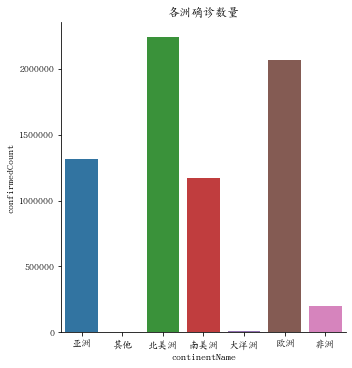

In [9]:
plt.rcParams["font.family"]="AR PL UKai CN" # 根据系统的字体来显示避免乱码
sns.catplot(x="continentName", y="confirmedCount", kind="bar", data=df3).set(title = '各洲确诊数量')

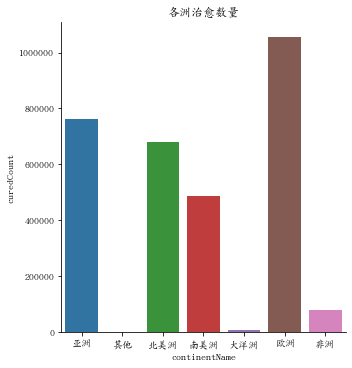

In [10]:
sns.catplot(x="continentName", y="curedCount", kind="bar", data=df3).set(title = '各洲治愈数量')

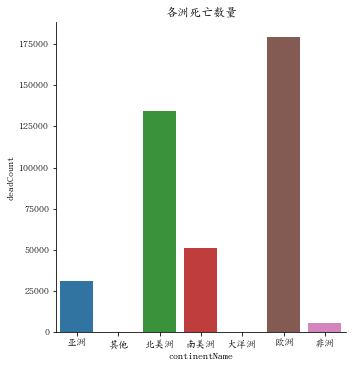

In [11]:
sns.catplot(x="continentName", y="deadCount", kind="bar", data=df3).set(title = '各洲死亡数量')

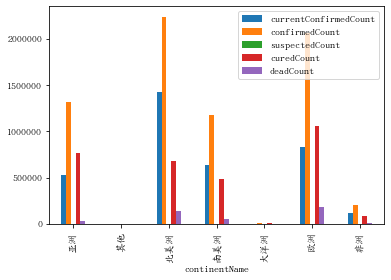

In [12]:
df3.plot(x="continentName", kind="bar")

In [13]:
df1

,locationId,continentName,continentEnglishName,countryName,countryEnglishName,countryFullName,provinceName,provinceEnglishName,provinceShortName,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,comment,cities,updateTime
0,955009,亚洲,Asia,以色列,Israel,Israel,以色列,Israel,以色列,2654,18089,0,15137,298,,None,2020-06
1,952009,亚洲,Asia,新加坡,Singapore,Singapore,新加坡,Singapore,新加坡,13930,38514,0,24559,25,,None,2020-06
2,973002,南美洲,South America,玻利维亚,Bolivia,Bolivia (Plurinational State of),玻利维亚,Bolivia,玻利维亚,12745,13358,0,159,454,,None,2020-06
3,983001,非洲,Africa,喀麦隆,Cameroon,Cameroon,喀麦隆,Cameroon,喀麦隆,5649,7860,0,1996,215,,None,2020-06
4,955002,亚洲,Asia,亚美尼亚,Armenia,Armenia,亚美尼亚,Armenia,亚美尼亚,9007,13675,0,4451,217,,None,2020-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,650000,亚洲,Asia,中国,China,None,新疆维吾尔自治区,Xinjiang,新疆,0,76,0,73,3,,"[{'cityName': '乌鲁木齐', 'currentConfirmedCount':...",2020-03
252,0,欧洲,Europe,大不列颠及北爱尔兰联合王国,United Kingdom of Great Britain and Ireland,None,大不列颠及北爱尔兰联合王国,United Kingdom of Great Britain and Ireland,大不列颠及北爱尔兰联合王国,12,20,0,8,0,,None,2020-02
253,0,欧洲,Europe,英国（含北爱尔兰）,United Kingdom,None,英国（含北爱尔兰）,United Kingdom,英国（含北爱尔兰）,12,20,0,8,0,,None,2020-02
254,0,欧洲,Europe,北爱尔兰,Northern Ireland,None,北爱尔兰,Northern Ireland,北爱尔兰,1,1,0,0,0,,None,2020-02


In [14]:
df_country = df1.loc[df1['countryName'] == df1['provinceShortName']].reset_index()
df_country = df_country.drop_duplicates(subset=['updateTime', 'countryName'], keep='last')
df_country = pd.DataFrame(df_country, columns=['countryName', 'confirmedCount', 'updateTime'])

In [15]:
df_country = df_country.sort_values(by="confirmedCount", ascending=False)
df_top10_country = df_country.head(10)

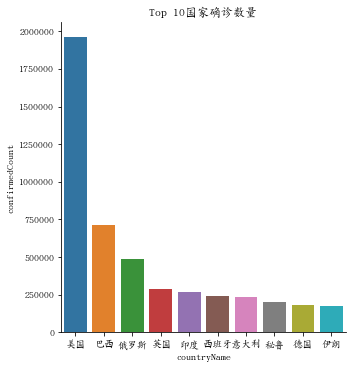

In [16]:
sns.catplot(x="countryName", y="confirmedCount", kind="bar", data=df_top10_country).set(title = 'Top 10国家确诊数量')

In [17]:
df_cn = df.loc[df['countryName'] == '中国'].reset_index()
df_cn = df_cn.drop(labels=1)
df_cn_top10 = df_cn.sort_values('confirmedCount', ascending=False).head(10).reset_index()
df_cn_top10

,level_0,index,locationId,continentName,continentEnglishName,countryName,countryEnglishName,countryFullName,provinceName,provinceEnglishName,provinceShortName,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,comment,cities,updateTime
0,14,205,420000,亚洲,Asia,中国,China,None,湖北省,Hubei,湖北,0,68135,0,63623,4512,4.17武汉市订正数据，武汉死亡核增1290，确诊核增325，治愈核减965,"[{'cityName': '武汉', 'currentConfirmedCount': 0...",2020-06
1,4,164,440000,亚洲,Asia,中国,China,None,广东省,Guangdong,广东,10,1604,11,1586,8,,"[{'cityName': '广州', 'currentConfirmedCount': 1...",2020-06
2,29,244,410000,亚洲,Asia,中国,China,None,河南省,Henan,河南,0,1276,0,1254,22,,"[{'cityName': '信阳', 'currentConfirmedCount': 0...",2020-04
3,23,227,330000,亚洲,Asia,中国,China,None,浙江省,Zhejiang,浙江,0,1268,3,1267,1,2月10日通报核减的12例在浙江省治愈的外省病例，根据国家最新要求重新纳入累计病例。,"[{'cityName': '温州', 'currentConfirmedCount': 0...",2020-05
4,6,192,810000,亚洲,Asia,中国,China,None,香港,Hong Kong,香港,54,1107,63,1049,4,疑似1例,[],2020-06
5,27,242,430000,亚洲,Asia,中国,China,None,湖南省,Hunan,湖南,0,1019,0,1015,4,,"[{'cityName': '长沙', 'currentConfirmedCount': 0...",2020-04
6,24,239,340000,亚洲,Asia,中国,China,None,安徽省,Anhui,安徽,0,991,0,985,6,,"[{'cityName': '合肥', 'currentConfirmedCount': 0...",2020-04
7,16,212,230000,亚洲,Asia,中国,China,None,黑龙江省,Heilongjiang,黑龙江,0,947,394,934,13,,"[{'cityName': '境外输入', 'currentConfirmedCount':...",2020-06
8,15,211,360000,亚洲,Asia,中国,China,None,江西省,Jiangxi,江西,0,932,0,931,1,,"[{'cityName': '南昌', 'currentConfirmedCount': 0...",2020-06
9,7,193,370000,亚洲,Asia,中国,China,None,山东省,Shandong,山东,4,792,14,781,7,,"[{'cityName': '境外输入', 'currentConfirmedCount':...",2020-06


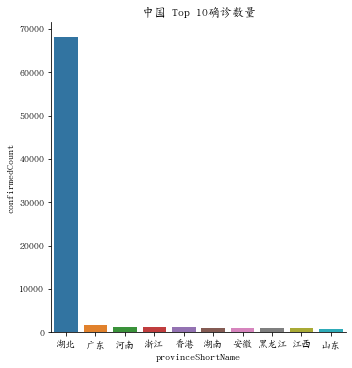

In [18]:
sns.catplot(x="provinceShortName", y="confirmedCount", kind="bar", data=df_cn_top10).set(title = '中国 Top 10确诊数量')